# Supervisely Data Labelling Example: Keypoints

## Installation & Authentication

In [1]:
%%capture
# install supervisely
! pip install supervisely

In [2]:
# import necessary libraries
import supervisely as sly
from supervisely.geometry.graph import Node
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from dotenv import load_dotenv

In [3]:
# authentication
load_dotenv(os.path.expanduser('~/supervisely.env'))
api = sly.Api.from_env()
my_teams = api.team.get_list()
team = my_teams[0]
workspace = api.workspace.get_list(team.id)[0]

## Input Data

In [4]:
# function for image visualization
def visualize_image(image_filepath):
  plt.figure(figsize=(12, 8))
  image = mpimg.imread(image_filepath)
  imageplot = plt.imshow(image)
  plt.axis('off')
  plt.show()

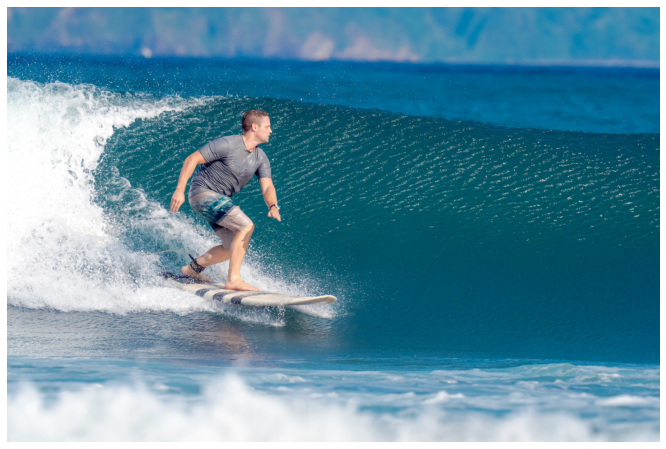

In [5]:
# visualize input data
image_filepath = 'images/Surfer.jpg'
visualize_image(image_filepath)

## Create Project On Server & Build Geometry Config

In [6]:
# create project and dataset
project = api.project.create(workspace.id, 'Surfer Pose Estimation', change_name_if_conflict=True)
dataset = api.dataset.create(project.id, 'Surfing', change_name_if_conflict=True)
print(f'Project {project.id} with dataset {dataset.id} are created')

Project 16263 with dataset 54615 are created


In [8]:
color = [255, 0, 0] # red
config = sly.GraphNodes.build_config(node_color=color, edge_color=color)

In [9]:
config

{'nodes': {'0': {'label': 'nose',
   'loc': [515, 248],
   'color': [255, 0, 0],
   'disabled': False},
  '1': {'label': 'left_eye',
   'loc': [536, 230],
   'color': [255, 0, 0],
   'disabled': False},
  '2': {'label': 'right_eye',
   'loc': [496, 228],
   'color': [255, 0, 0],
   'disabled': False},
  '3': {'label': 'left_ear',
   'loc': [561, 248],
   'color': [255, 0, 0],
   'disabled': False},
  '4': {'label': 'right_ear',
   'loc': [464, 242],
   'color': [255, 0, 0],
   'disabled': False},
  '5': {'label': 'left_shoulder',
   'loc': [615, 387],
   'color': [255, 0, 0],
   'disabled': False},
  '6': {'label': 'right_shoulder',
   'loc': [400, 383],
   'color': [255, 0, 0],
   'disabled': False},
  '7': {'label': 'left_elbow',
   'loc': [653, 559],
   'color': [255, 0, 0],
   'disabled': False},
  '8': {'label': 'right_elbow',
   'loc': [364, 554],
   'color': [255, 0, 0],
   'disabled': False},
  '9': {'label': 'left_wrist',
   'loc': [655, 712],
   'color': [255, 0, 0],
   'disa

In [10]:
# create annotation class
surfer = sly.ObjClass('surfer',
                      geometry_type=sly.GraphNodes,
                      geometry_config=config)
project_meta = sly.ProjectMeta(obj_classes=[surfer])
api.project.update_meta(project.id, project_meta.to_json())

## Upload Image

In [11]:
# upload image to the dataset
image_info = api.image.upload_path(dataset.id,
                                   name='Surfer.jpg',
                                   path='images/Surfer.jpg')

## Create Annotation & Upload To Image

In [12]:
# build keypoints graph
vertex_0 = Node(sly.PointLocation(364, 775), disabled=False)
vertex_1 = Node(sly.PointLocation(353, 773), disabled=False)
vertex_2 = Node(sly.PointLocation(352, 766), disabled=False)
vertex_3 = Node(sly.PointLocation(358, 736), disabled=False)
vertex_4 = Node(sly.PointLocation(357, 725), disabled=False)
vertex_5 = Node(sly.PointLocation(447, 747), disabled=False)
vertex_6 = Node(sly.PointLocation(403, 649), disabled=False)
vertex_7 = Node(sly.PointLocation(531, 767), disabled=False)
vertex_8 = Node(sly.PointLocation(448, 545), disabled=False)
vertex_9 = Node(sly.PointLocation(585, 782), disabled=False)
vertex_10 = Node(sly.PointLocation(538, 507), disabled=False)
vertex_11 = Node(sly.PointLocation(567, 624), disabled=False)
vertex_12 = Node(sly.PointLocation(545, 576), disabled=False)
vertex_13 = Node(sly.PointLocation(700, 668), disabled=False)
vertex_14 = Node(sly.PointLocation(646, 704), disabled=False)
vertex_15 = Node(sly.PointLocation(769, 547), disabled=False)
vertex_16 = Node(sly.PointLocation(802, 665), disabled=False)
nodes = {'0': vertex_0, '1': vertex_1, '2': vertex_2, '3': vertex_3, '4': vertex_4,
         '5': vertex_5, '6': vertex_6, '7': vertex_7, '8': vertex_8, '9': vertex_9,
         '10': vertex_10, '11': vertex_11, '12': vertex_12, '13': vertex_13, '14': vertex_14,
         '15': vertex_15, '16': vertex_16}

In [13]:
# label the image
label = sly.Label(sly.GraphNodes(nodes), surfer)
ann = sly.Annotation(img_size=[1280, 1920], labels=[label])
api.annotation.upload_ann(image_info.id, ann)

## Download Data

In [14]:
# download image and annotation
image = api.image.download_np(image_info.id)
print('image shape (height, width, channels)', image.shape)

ann_json = api.annotation.download_json(image_info.id) 
print('annotaiton:\n', json.dumps(ann_json, indent=4))

image shape (height, width, channels) (1280, 1920, 3)
annotaiton:
 {
    "description": "",
    "tags": [],
    "size": {
        "height": 1280,
        "width": 1920
    },
    "objects": [
        {
            "id": 85298203,
            "classId": 600244,
            "description": "",
            "geometryType": "graph",
            "labelerLogin": "tesmaxxxx",
            "createdAt": "2023-01-12T20:34:15.390Z",
            "updatedAt": "2023-01-12T20:34:15.390Z",
            "tags": [],
            "classTitle": "surfer",
            "nodes": {
                "0": {
                    "loc": [
                        775,
                        364
                    ]
                },
                "1": {
                    "loc": [
                        773,
                        353
                    ]
                },
                "2": {
                    "loc": [
                        766,
                        352
                    ]
          

## Result

In [15]:
# draw annotation
ann = sly.Annotation.from_json(ann_json, project_meta)
output_path = 'images/Labeled.jpg'
ann.draw_pretty(image, output_path=output_path, thickness=3)

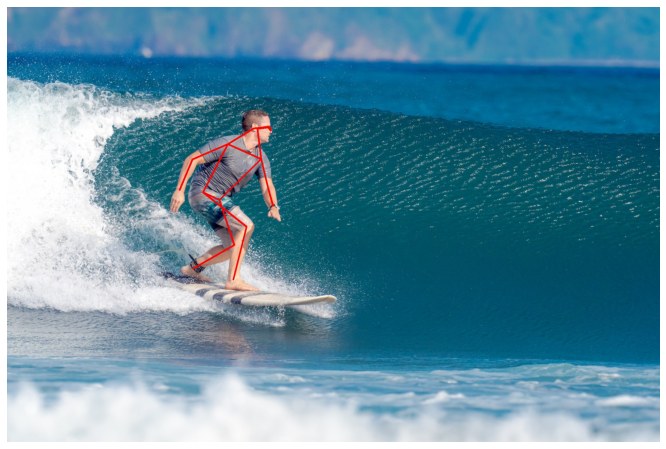

In [16]:
# visualize result
visualize_image(output_path)